In [33]:
!pip install tensorflow

In [34]:
!pip install keras

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

# Forest Fires file

In [36]:
df = pd.read_csv('forestfires.csv')

In [37]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [38]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [39]:
df.shape

(517, 31)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [41]:
df.drop(['month','day'], inplace = True, axis = 1)

In [42]:
df.isna().sum()/len(df)*100

FFMC             0.0
DMC              0.0
DC               0.0
ISI              0.0
temp             0.0
RH               0.0
wind             0.0
rain             0.0
area             0.0
dayfri           0.0
daymon           0.0
daysat           0.0
daysun           0.0
daythu           0.0
daytue           0.0
daywed           0.0
monthapr         0.0
monthaug         0.0
monthdec         0.0
monthfeb         0.0
monthjan         0.0
monthjul         0.0
monthjun         0.0
monthmar         0.0
monthmay         0.0
monthnov         0.0
monthoct         0.0
monthsep         0.0
size_category    0.0
dtype: float64

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [44]:
df.var()

FFMC           30.471624
DMC          4101.951889
DC          61536.835467
ISI            20.788832
temp           33.716898
RH            266.259802
wind            3.210019
rain            0.087592
area         4052.063225
dayfri          0.137646
daymon          0.122884
daysat          0.136341
daysun          0.150278
daythu          0.104269
daytue          0.108677
daywed          0.093720
monthapr        0.017138
monthaug        0.229679
monthdec        0.017138
monthfeb        0.037260
monthjan        0.003861
monthjul        0.058177
monthjun        0.031862
monthmar        0.093720
monthmay        0.003861
monthnov        0.001934
monthoct        0.028226
monthsep        0.222437
dtype: float64

In [45]:
df.std()

FFMC          5.520111
DMC          64.046482
DC          248.066192
ISI           4.559477
temp          5.806625
RH           16.317469
wind          1.791653
rain          0.295959
area         63.655818
dayfri        0.371006
daymon        0.350548
daysat        0.369244
daysun        0.387657
daythu        0.322907
daytue        0.329662
daywed        0.306138
monthapr      0.130913
monthaug      0.479249
monthdec      0.130913
monthfeb      0.193029
monthjan      0.062137
monthjul      0.241199
monthjun      0.178500
monthmar      0.306138
monthmay      0.062137
monthnov      0.043980
monthoct      0.168007
monthsep      0.471632
dtype: float64

In [46]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

In [47]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [48]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['size_category'] = le.fit_transform(df['size_category'])

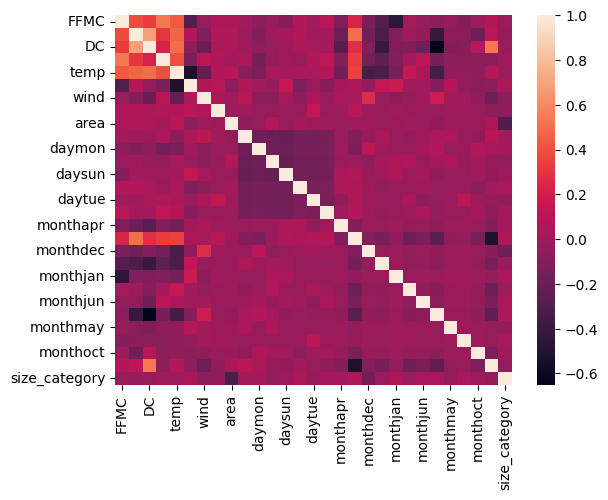

In [49]:
sns.heatmap(df.corr())
plt.show()

In [50]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [51]:
#Independent & Dependent Variables

x = df.iloc[ : , : -1]
y = df.iloc[ : , -1]

In [52]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int64

In [54]:
#Splitting the dataset into Training and Testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [55]:
x_train.shape

(413, 28)

In [56]:
y_train.shape

(413,)

In [57]:
x_test.shape

(104, 28)

In [58]:
y_test.shape

(104,)

In [59]:
#Create the Model (Neural Network)

model = Sequential() #Neural Network we are going to create is going to be connected from layers to layers

model.add(Dense(30, input_dim=28,  activation='relu')) #Input Layer 8 & 1st Hidden Layer 20 Neurons

model.add(Dense(20,  activation='relu')) #2nd Hidden layer

model.add(Dense(20,  activation='relu')) #3rd Hidden layer

model.add(Dense(1, activation='sigmoid')) #Output Layer

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
#Fit the Model in Training Dataset

h = model.fit(x_train, y_train, validation_split=0.2, epochs = 40, batch_size = 40)

# evaluate the model on train data

scores = model.evaluate(x_train, y_train)
print(model.metrics_names[1], scores[1]*100)

Epoch 1/40
9/9 [==============================] - 1s 32ms/step - loss: 7.5306 - accuracy: 0.7394 - val_loss: 3.5640 - val_accuracy: 0.7108
Epoch 2/40
9/9 [==============================] - 0s 8ms/step - loss: 2.0541 - accuracy: 0.4818 - val_loss: 1.0884 - val_accuracy: 0.5301
Epoch 3/40
9/9 [==============================] - 0s 8ms/step - loss: 1.1652 - accuracy: 0.7030 - val_loss: 1.6786 - val_accuracy: 0.7470
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 0.8952 - accuracy: 0.7152 - val_loss: 0.9474 - val_accuracy: 0.5422
Epoch 5/40
9/9 [==============================] - 0s 6ms/step - loss: 0.6580 - accuracy: 0.6879 - val_loss: 0.9843 - val_accuracy: 0.7590
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 0.5794 - accuracy: 0.7273 - val_loss: 0.7680 - val_accuracy: 0.5783
Epoch 7/40
9/9 [==============================] - 0s 6ms/step - loss: 0.5529 - accuracy: 0.7455 - val_loss: 0.7964 - val_accuracy: 0.7590
Epoch 8/40
9/9 [=================

In [62]:
#Visualize training history

h.history.keys()

#extracting out all the keys from above model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

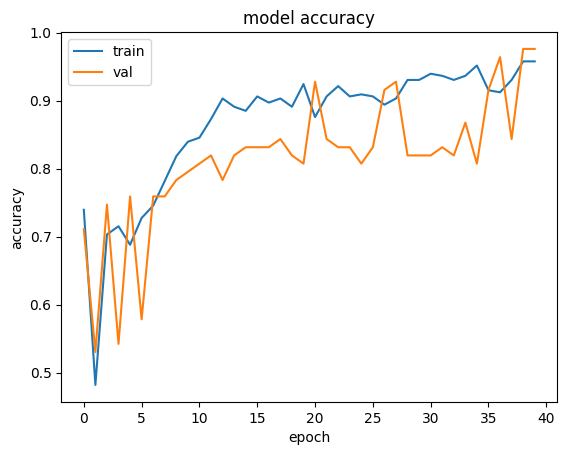

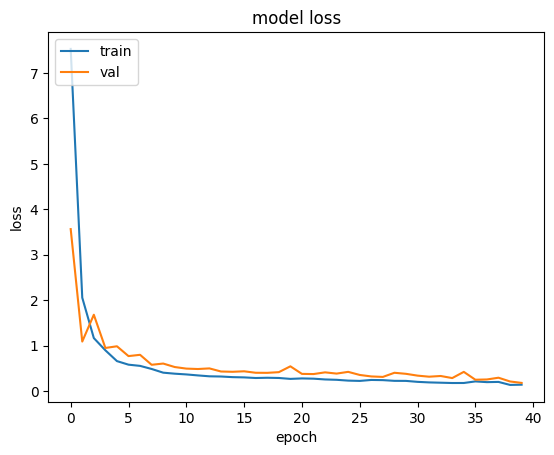

In [63]:
# summarize history for accuracy

#Plotting the Training set and Validation set

import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [64]:
#Testing it out on the actual Test Dataset

scores = model.evaluate(x_test, y_test)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.1933 - accuracy: 0.9135
accuracy: 91.35%
